
# **Resources**

SentenceTransformers Documentation: https://www.sbert.net/

Pretrained Models for SentenceTransformers:https://www.sbert.net/docs/pretrained_models.html

Corpus and Algorithm idea from: https://stackoverflow.com/questions/55619176/how-to-cluster-similar-sentences-using-bert

# **Sentence Transformers installation**
The "sentence-transformers" library is a Python package that provides pre-trained models for converting sentences or texts into dense vector representations. These vector representations, also known as embeddings, capture the semantic meaning of the input text.



In [ ]:
!pip install -U sentence-transformers

# **Tweet-preprocessor installation**
 The "tweet-preprocessor" package is a useful tool when working with tweet data, allowing you to preprocess and clean tweet text for a variety of applications, including text analysis, machine learning, data mining, and social media analytics.

In [ ]:
!pip install tweet-preprocessor

# **Loading the packages**





In [ ]:
import pandas as pd
from sentence_transformers import SentenceTransformer
import re
import preprocessor as p
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# **SentenceTransformer instance Initialization**
 Initialization of an instance of the SentenceTransformer class from the "sentence-transformers" package, specifically using the 'all-MiniLM-L6-v2' model as the underlying embedding model.

In [ ]:
embedder = SentenceTransformer('all-MiniLM-L6-v2')

# **Read the Data**

In [ ]:
df = pd.read_csv('dataset.csv.txt')

df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


# **Cleaning the Data Frame**




**Preprocessor** library provides functionality to clean and preprocess tweets, possibly by removing URLs, usernames, hashtags, and other unwanted elements from the tweet text.

In [ ]:
def clean_tweets(df):
    # punctuations we want to be replaced
    REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\|)|(\()|(\))|(\[)|(\])|(\%)|(\$)|(\>)|(\<)|(\{)|(\})")
    REPLACE_WITH_SPACE = re.compile("(<br\s/><br\s/?)|(-)|(/)|(:).")
    corpus = []
    for line in df:
        # clean data by sending it to tweet_processor
        sentence = p.clean(line)
        # remove puctuation
        sentence = REPLACE_NO_SPACE.sub("", sentence.lower()) # convert all tweets to lower cases
        sentence = REPLACE_WITH_SPACE.sub(" ", sentence)
        corpus.append(sentence)
    return corpus

We call the "clean_tweets" function and we add the values as a new column in the data frame to visualize the difference before and after cleaning.





In [ ]:
df['clean tweet'] = clean_tweets(df['tweet'])
df.head()

,id,label,tweet,clean tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for credit i cant use cause they dont o...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,i love u take with u all the time in ur
4,5,0,factsguide: society now #motivation,factsguide society now


# **Corpus list to manipulate**
We extract the values of 'clean_tweet' column in a list.


In [ ]:
corpus = list(df['clean tweet'])

# **True Values Extraction**
The extraction of true values(clusters numbers) in a list to use it later.

In [ ]:
trueValues=[]
for i in df["label"]:
  trueValues.append(i)
trueValues

# **Clustering**


Cluster 1: Positive/Neutral Sentiments on Various Topics

Cluster 2: Negative/Challenging Experiences and Topics

The code demonstrates how to use the embedder object (created from the SentenceTransformer class) to encode a corpus of sentences or texts into their corresponding embeddings.

Each element in corpus_embeddings will correspond to the embedding representation of the corresponding sentence or text in the corpus. These embeddings capture the semantic meaning of the text and can be used for various downstream tasks such as similarity comparison, clustering, or as input to machine learning models.

NB: The dimensions and shape of the resulting corpus_embeddings may depend on the specific model used and the length of the input corpus.

In [ ]:
import numpy as np
corpus_embeddings = embedder.encode(corpus)
corpus_embeddings=corpus_embeddings /  np.linalg.norm(corpus_embeddings, axis=1, keepdims=True)
corpus_embeddings

array([[-0.01858451, -0.00946122, -0.03774697, ...,  0.0614611 ,
         0.04655675, -0.00101867],
       [ 0.01542658, -0.03189151,  0.0056922 , ...,  0.04044088,
         0.05792318,  0.00691462],
       [ 0.01421261,  0.0379439 ,  0.06595628, ..., -0.03102798,
         0.04469712, -0.12437299],
       ...,
       [ 0.0549296 ,  0.06090625, -0.00566697, ..., -0.02521879,
         0.02394001,  0.05956136],
       [ 0.00548924,  0.05445819,  0.04427702, ..., -0.1221757 ,
         0.08877689, -0.03746802],
       [ 0.01154226,  0.01872647,  0.01054552, ...,  0.07992537,
         0.08985571,  0.00592   ]], dtype=float32)

# **Agglomerative Algorithm Explication**
Steps to agglomerative hierarchical clustering :
1. Preparing the data
2. Computing (dis)similarity information between every pair of objects in the data set.
3. Using the linkage function to group objects into a hierarchical cluster tree, based on the distance information generated in step 1. Objects/clusters that are in close proximity are linked together using the linkage function.
4. Determining where to cut the hierarchical tree into clusters. This creates a partition of the data.

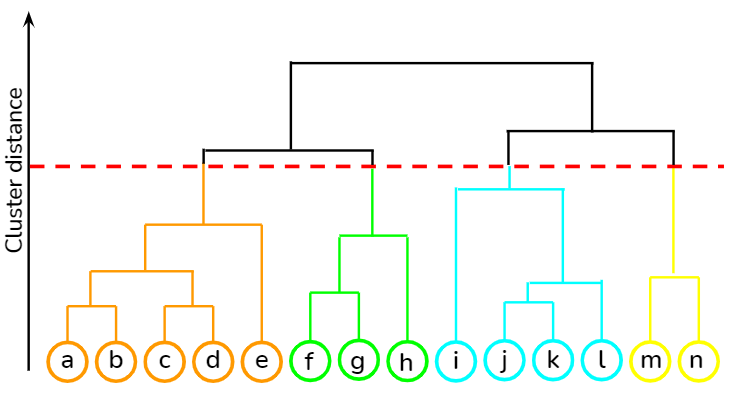

In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
# Perform Agglomerative clustering
from sklearn.cluster import AgglomerativeClustering
clustering_model = AgglomerativeClustering(n_clusters=2, distance_threshold=None)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_


In [ ]:
cluster_assignment = clustering_model.labels_

In [ ]:
cluster_assignment

array([0, 0, 0, ..., 0, 0, 0])

#**Cluster_df creation**

 We create a DataFrame "**cluster_df**" that contains the original sentences or texts in the '**corpus**' column, along with the corresponding cluster assignments in the '**cluster**' column.


In [ ]:
cluster_df = pd.DataFrame(corpus, columns = ['corpus'])
cluster_df['cluster'] = cluster_assignment
cluster_df.head()

,corpus,cluster
0,when a father is dysfunctional and is so selfi...,0
1,thanks for credit i cant use cause they dont o...,0
2,bihday your majesty,0
3,i love u take with u all the time in ur,0
4,factsguide society now,0


# **Prints the cluster number & the sentences within that cluster**
The code organizes the sentences from the corpus into their respective clusters, and then displays the sentences within each cluster. This can help you gain insights into the contents and patterns within each cluster.

In [ ]:
clustered_sentences = {}
for sentence_id, cluster_id in enumerate(cluster_assignment):
    if cluster_id not in clustered_sentences:
        clustered_sentences[cluster_id] = []

    clustered_sentences[cluster_id].append(corpus[sentence_id])

for i, cluster in clustered_sentences.items():
    print("Cluster ", i+1)
    print(cluster)
    print("")

Cluster  1
['when a father is dysfunctional and is so selfish he drags his kids into his dysfunction', 'thanks for credit i cant use cause they dont offer wheelchair vans in pdx', 'bihday your majesty', 'i love u take with u all the time in ur', 'factsguide society now', '2 2 huge fan fare and big talking before they leave chaos and pay disputes when they get there', 'camping tomorrow danny', 'the next school year is the year for exams cant think about that', 'welcome here  im its so ', 'consumer price index mom climbed from previous  to  in may', 'we are so selfish', 'i get to see my daddy today', 'calls middle school build the wall chant ', 'no comment in', 'ouchjunior is angry', 'i am thankful for having a paner', 'retweet if you agree', 'its  smiles all around via ig user make people', 'as we all know essential oils are not made of chemicals', 'people blaming ha for conceded goal was it fat rooney who gave away free kick knowing bale can hit them from there', 'sad little dude', 'pr


# **F_measure (F1-score)**
 F-measure score, which is a metric commonly used to evaluate the clustering performance. It quantifies the trade-off between precision and recall, providing a single value that represents the overall clustering quality. The higher the F-measure score, the better the clustering performance.



In [ ]:
from sklearn.metrics import f1_score

# Calculate F-measure
f_measure = f1_score(trueValues, cluster_assignment, average='weighted')

print("F-measure:", f_measure)

F-measure: 0.9012320733621411


# **Accuracy**
**'get_accuracy**' that calculates the accuracy score between the predicted values (predictions) and the true values (Y). It returns the accuracy score, which represents the proportion of correct predictions out of the total number of predictions.

In [ ]:
def get_accuracy(predictions, Y):
    #print(predictions, Y)
    return np.sum(predictions == Y) / len(Y)

In [ ]:
a=get_accuracy(cluster_assignment,trueValues)
a

0.8936319431456892

#**Silhouette_score**
The average Silhouette score is also used as an evaluation measure in clustering. The best silhouette score is 1 and the worst is -1. Values close to zero indicate that data points are on the boundary i.e overlapping the clusters.

In [ ]:
from sklearn.metrics import silhouette_score

# Assuming 'corpus_embeddings' is the sentence representations and 'cluster_assignment' is the predicted clusters
silhouette_avg = silhouette_score(corpus_embeddings, cluster_assignment)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.02795937


# **Calinski_harabasz_score**
The Calinski-Harabasz index is a metric commonly used to evaluate the quality of clustering results. The index measures the ratio between the within-cluster dispersion and the between-cluster dispersion, where higher values indicate better-defined clusters and better clustering performance.

In [ ]:
from sklearn.metrics import calinski_harabasz_score

calinski_score = calinski_harabasz_score(corpus_embeddings, cluster_assignment)
print("Calinski-Harabasz Index:", calinski_score)

Calinski-Harabasz Index: 248.7274452666784


# **Davies_bouldin_score**
The Davies Bouldin score provides insight into the separation and compactness of clusters. Lower scores indicate better clustering results, where each cluster is well-separated from others and internally cohesive.

In [ ]:
from sklearn.metrics import davies_bouldin_score

davies_bouldin_score = davies_bouldin_score(corpus_embeddings, cluster_assignment)
print("Davies-Bouldin Index:", davies_bouldin_score)

Davies-Bouldin Index: 5.404965383630892
